In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### Data merging and cleaning

Since the data was scraped in several chunks. We have scraped the data from the cars24. We are only able to fetch the data of around 2500 cars because the cars24 is available for very few cities and the number of cars is relatively low. Below is the code to merge all the dataframes.

In [110]:
df2 = pd.read_csv("df_set2.csv")
df3 = pd.read_csv("df_set3.csv")
df4 = pd.read_csv("df_set4.csv")
df5 = pd.read_csv("df_set5.csv")
df6 = pd.read_csv("df_set6.csv")
df7 = pd.read_csv("df_set7.csv")
df8 = pd.read_csv("df_set8.csv")
df9 = pd.read_csv("df_set9.csv")

Some of the columns have little bit of different names so we have to change the name to make them uniform.

In [111]:
df3.rename(columns={'Audio system': 'Audio System'}, inplace=True)
df4.rename(columns={'Audio system': 'Audio System'}, inplace=True)
df5.rename(columns={'Audio system': 'Audio System'}, inplace=True)
df6.rename(columns={'Audio system': 'Audio System'}, inplace=True)
df7.rename(columns={'Audio system': 'Audio System'}, inplace=True)
df8.rename(columns={'Audio system': 'Audio System'}, inplace=True)
df9.rename(columns={'Audio system': 'Audio System'}, inplace=True)

In [112]:
# concatenate all the dataframes
df = pd.concat([df2,df3,df4, df5, df6, df7, df8, df9])

C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [113]:
df.shape

(2639, 60)

In [114]:
df.head()

,AC Unit,Apron LHS,Apron RHS,Audio System,Battery,Bonnet/Hood,Boot Floor,Brakes,Bumper Front,Bumper Rear,...,brand,car_id,city,history,insurance_type,insurance_valid_m,insurance_valid_y,kilometers_driven,owner,price
0,1,1,1,0,1,1,1,1,1,1,...,Renault,1191177749,Kolkata,Non-Accidental,3rd Party,Dec,2022,27775,1,276199
1,1,1,1,0,1,1,1,1,1,1,...,Maruti,1192198800,Kolkata,Non-Accidental,Comp,Mar,2022,30217,1,559299
2,1,1,1,0,1,1,0,1,1,1,...,Hyundai,1198610344,Kolkata,Non-Accidental,3rd Party,Dec,2022,46591,1,199999
3,1,1,1,0,1,1,1,1,1,1,...,Hyundai,2865123843,Kolkata,Non-Accidental,Comp,Mar,2022,35383,1,162599
4,1,1,1,0,1,1,1,1,1,1,...,Hyundai,1196608903,Kolkata,Non-Accidental,Zero_Dep,Mar,2022,31602,2,505199


In [115]:
df.columns

Index(['AC Unit', 'Apron LHS', 'Apron RHS', 'Audio System', 'Battery',
       'Bonnet/Hood', 'Boot Floor', 'Brakes', 'Bumper Front', 'Bumper Rear',
       'Clutch', 'Control Panel', 'Coolant', 'Cooling System', 'Dashboard',
       'Dicky /Boot Door', 'Dicky Door/Boot Door', 'Door LHS Front',
       'Door LHS Rear', 'Door RHS Front', 'Door RHS Rear', 'Engine',
       'Engine Mounting', 'Engine Oil', 'Engine Sound',
       'Engine permissible blow by(black compression)', 'Exhaust Smoke',
       'Fuel Type', 'Gear Lever', 'Gear Shifting', 'Head Light Support',
       'Heater', 'Leather Seats',
       'Lights\nLHS Fog Light\nLHS Headlight\nLHS Taillight\nRHS Fog Light\nRHS Headlight\nRHS Taillight',
       'Lights\nLHS Taillight\nRHS Taillight\nLHS Headlight\nRHS Headlight',
       'ORVM LHS', 'ORVM RHS', 'Radiator Support', 'Roof',
       'Running Border\nLHS\nRHS', 'Steering', 'Suspension', 'Transmission',
       'Turbocharger',
       'Tyre\nLHS Front Tyre\nRHS Front Tyre\nLHS Rear Tyre

Some of the columns have some uneven names. For example the column containing the information about the tyres has long name. So we need to make it shorter.

In [116]:
df.rename(columns={'Tyre\nLHS Front Tyre\nRHS Front Tyre\nLHS Rear Tyre\nRHS Rear Tyre\nSpare Tyre': 'tyres',
                  'Lights\nLHS Fog Light\nLHS Headlight\nLHS Taillight\nRHS Fog Light\nRHS Headlight\nRHS Taillight': 'Lights_1',
                  "Lights\nLHS Taillight\nRHS Taillight\nLHS Headlight\nRHS Headlight":"Lights_2",
                  'Bonnet/Hood':'Bonnet', 'Dicky /Boot Door': 'Boot Door_1', 'Dicky Door/Boot Door': 'Boot Door 2',
                  'Running Border\nLHS\nRHS': 'Running Board','Engine permissible blow by(black compression)':'black compression'}, inplace=True)

In [117]:
df.columns

Index(['AC Unit', 'Apron LHS', 'Apron RHS', 'Audio System', 'Battery',
       'Bonnet', 'Boot Floor', 'Brakes', 'Bumper Front', 'Bumper Rear',
       'Clutch', 'Control Panel', 'Coolant', 'Cooling System', 'Dashboard',
       'Boot Door_1', 'Boot Door 2', 'Door LHS Front', 'Door LHS Rear',
       'Door RHS Front', 'Door RHS Rear', 'Engine', 'Engine Mounting',
       'Engine Oil', 'Engine Sound', 'black compression', 'Exhaust Smoke',
       'Fuel Type', 'Gear Lever', 'Gear Shifting', 'Head Light Support',
       'Heater', 'Leather Seats', 'Lights_1', 'Lights_2', 'ORVM LHS',
       'ORVM RHS', 'Radiator Support', 'Roof', 'Running Board', 'Steering',
       'Suspension', 'Transmission', 'Turbocharger', 'tyres', 'Unnamed: 0',
       'Unnamed: 0.1', 'Windshield Front', 'Windshield Rear',
       'Year of Purchase', 'brand', 'car_id', 'city', 'history',
       'insurance_type', 'insurance_valid_m', 'insurance_valid_y',
       'kilometers_driven', 'owner', 'price'],
      dtype='object')

In [118]:
# removing the muptiple index columns
df.drop(["Unnamed: 0",'Unnamed: 0.1'], axis = 1, inplace = True)

Some of the webpages has car price zero which practically impossible so those instances has to be removed because we have to predict the price of the cars. So zero price may or may not affect the accuracy of the model but it will given some biased output.

In [119]:
df = df[df["price"]!=0]
df.shape

(2567, 58)

In [120]:
df.isna().sum()

AC Unit                0
Apron LHS              0
Apron RHS              0
Audio System           0
Battery                0
Bonnet                 0
Boot Floor             0
Brakes                 0
Bumper Front           0
Bumper Rear            0
Clutch                 0
Control Panel          0
Coolant                0
Cooling System         0
Dashboard              0
Boot Door_1            0
Boot Door 2            0
Door LHS Front         0
Door LHS Rear          0
Door RHS Front         0
Door RHS Rear          0
Engine                 0
Engine Mounting        0
Engine Oil             0
Engine Sound           0
black compression      0
Exhaust Smoke          0
Fuel Type              0
Gear Lever             0
Gear Shifting          0
Head Light Support     0
Heater                 0
Leather Seats          0
Lights_1               0
Lights_2               0
ORVM LHS               0
ORVM RHS               0
Radiator Support       0
Roof                   0
Running Board          0


There are 34 missing values in transmission and 3 missing values in insurance. We will fill these missing values with the mode values.

In [121]:
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)
df['insurance_type'].fillna(df['insurance_type'].mode()[0], inplace=True)

Since we have so many columns but not all the features are much important to decide the resale price of the car. We will quickly train a decision tree model and will get the important fetures for the price prediction. We may get rid of the unimportant features so that models can work efficiently.

In [122]:
df_ = df.drop(['car_id'], axis = 1)
from sklearn.preprocessing import LabelEncoder

for column in list(df.drop(["price","kilometers_driven",'car_id'], axis = 1).columns):
    encoder = LabelEncoder()
    df_[column] = encoder.fit_transform(df_[column]) 

In [123]:
from sklearn.tree import DecisionTreeRegressor
X = df_.drop(["price"], axis = 1)
y = df_['price']
DT = DecisionTreeRegressor()
DT.fit(X,y)

DecisionTreeRegressor()

In [124]:
DT.feature_importances_

array([1.25280756e-05, 9.72100015e-05, 0.00000000e+00, 3.66761702e-03,
       4.91386544e-04, 3.06850443e-03, 8.22773121e-04, 8.23760928e-04,
       2.61479201e-03, 5.59670009e-03, 4.47205275e-06, 3.14514064e-04,
       1.69084304e-07, 1.54869904e-03, 7.29727769e-03, 8.99924263e-04,
       1.35524230e-04, 2.66319707e-04, 2.33882696e-03, 3.25934670e-04,
       5.24813661e-04, 8.30101519e-05, 3.35976440e-04, 2.60097665e-03,
       1.52812057e-03, 3.56902310e-05, 1.81944667e-07, 1.24527986e-01,
       0.00000000e+00, 2.24534173e-04, 8.66615280e-08, 2.85583039e-07,
       1.55221583e-03, 5.08388288e-04, 5.29786131e-06, 5.21932676e-03,
       9.11167216e-04, 2.64194224e-09, 1.38119212e-05, 1.28654872e-03,
       6.88568985e-06, 2.45816038e-06, 1.77131912e-01, 7.78624755e-04,
       1.69773029e-02, 6.12914643e-04, 1.34894957e-03, 1.75964330e-01,
       2.74204915e-01, 3.76764806e-02, 0.00000000e+00, 2.01087922e-02,
       1.75399125e-02, 2.43719404e-03, 9.40259130e-02, 1.14980599e-02])

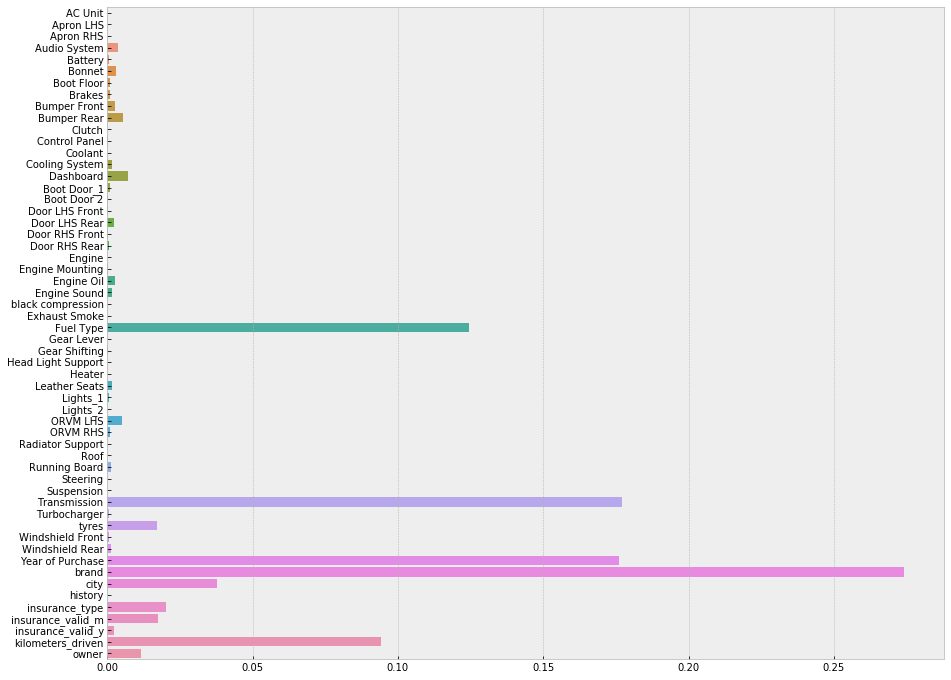

In [125]:
plt.figure(figsize=(15, 12))
sns.barplot(DT.feature_importances_, list(X.columns))

It is clear from the bar graph that all the features are no important for price prediction. We will drop the unimportant features. We will set the threshold 0.001 for it.

In [126]:
feat_imp = list(DT.feature_importances_)
feat = list(X.columns)
imp_feat = []
for i in range(len(feat)):
    if feat_imp[i] > 0.0005:
        imp_feat.append(feat[i])

In [127]:
df["city"].value_counts()

Chandigarh    371
Delhi         342
Pune          289
Ahmedabad     241
Chennai       209
Bengaluru     158
Noida         152
Mumbai        139
Ludhiana      124
Surat         108
Nagpur         66
Nasik          66
Kolkata        62
Faridabad      51
Kochi          49
Patna          39
Gurgaon        37
Panipat        24
Bhopal         15
Rohtak         13
Zirakpur        6
Panchkula       5
Mohali          1
Name: city, dtype: int64

In [128]:
df.replace("Mohali","Chandigarh", inplace = True)
df.replace("Panchkula","Chandigarh", inplace = True)
df.replace("Zirakpur","Chandigarh", inplace = True)

## Feature Engineering

In [129]:
print(imp_feat)

['Audio System', 'Bonnet', 'Boot Floor', 'Brakes', 'Bumper Front', 'Bumper Rear', 'Cooling System', 'Dashboard', 'Boot Door_1', 'Door LHS Rear', 'Door RHS Rear', 'Engine Oil', 'Engine Sound', 'Fuel Type', 'Leather Seats', 'Lights_1', 'ORVM LHS', 'ORVM RHS', 'Running Board', 'Transmission', 'Turbocharger', 'tyres', 'Windshield Front', 'Windshield Rear', 'Year of Purchase', 'brand', 'city', 'insurance_type', 'insurance_valid_m', 'insurance_valid_y', 'kilometers_driven', 'owner']


Some similar features has different columns. For example ORVM LHS and ORVM RHS are similar components of the car but have different columns. We will merge those columns into a single ORVM column by adding them. If both ORVM are perfect, then it will be 2, if one of the ORVM is defected, then it will be 1 and if both the ORVM are defected then it will be 0. Similar features engineering has been done for some of the other columns.

In [130]:
df["Doors"] = df["Door LHS Rear"]+df["Door RHS Rear"]+df["Door LHS Front"]+df["Door RHS Front"]

In [131]:
df.drop(['Door LHS Front', 'Door LHS Rear', 'Door RHS Front','Door RHS Rear'], axis = 1, inplace = True)

In [132]:
df["Boot Door"] = df["Boot Door_1"]+df["Boot Door 2"]

In [133]:
df.drop(['Boot Door_1',"Boot Door 2"], axis = 1, inplace = True)

In [134]:
df["Bumper"] = df["Bumper Front"]+df["Bumper Rear"]

In [135]:
df.drop(["Bumper Front", 'Bumper Rear'], axis = 1, inplace = True)

In [136]:
df["ORVM"] = df["ORVM LHS"]+df["ORVM RHS"]

In [137]:
df.drop(["ORVM LHS", "ORVM RHS"], axis = True, inplace = True)

In [138]:
df.replace("Third_party","3rd Party", inplace=True)
df.replace("Third Party","3rd Party", inplace=True)

# EDA

In [139]:
print(df.columns)

Index(['AC Unit', 'Apron LHS', 'Apron RHS', 'Audio System', 'Battery',
       'Bonnet', 'Boot Floor', 'Brakes', 'Clutch', 'Control Panel', 'Coolant',
       'Cooling System', 'Dashboard', 'Engine', 'Engine Mounting',
       'Engine Oil', 'Engine Sound', 'black compression', 'Exhaust Smoke',
       'Fuel Type', 'Gear Lever', 'Gear Shifting', 'Head Light Support',
       'Heater', 'Leather Seats', 'Lights_1', 'Lights_2', 'Radiator Support',
       'Roof', 'Running Board', 'Steering', 'Suspension', 'Transmission',
       'Turbocharger', 'tyres', 'Windshield Front', 'Windshield Rear',
       'Year of Purchase', 'brand', 'car_id', 'city', 'history',
       'insurance_type', 'insurance_valid_m', 'insurance_valid_y',
       'kilometers_driven', 'owner', 'price', 'Doors', 'Boot Door', 'Bumper',
       'ORVM'],
      dtype='object')


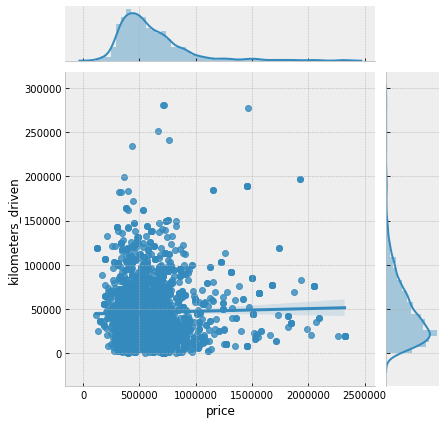

In [140]:
sns.jointplot(df["price"], df["kilometers_driven"], kind = "reg")

In [141]:
df = df[df['kilometers_driven']<150000]
df = df[df['price']<1500000]
df.shape

(2479, 52)

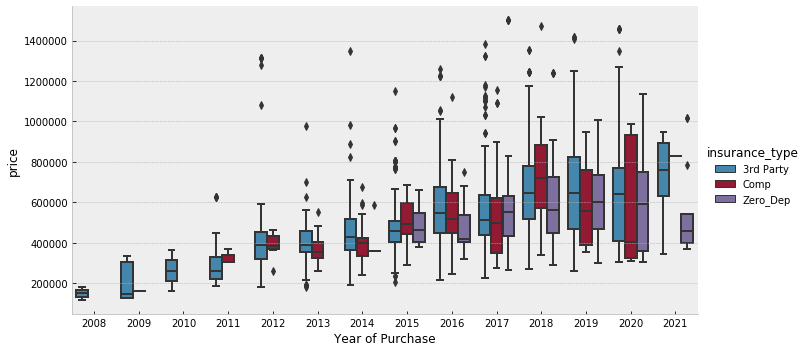

In [142]:
sns.catplot(x="Year of Purchase", y="price", kind="box", hue = "insurance_type",data=df, aspect = 2)

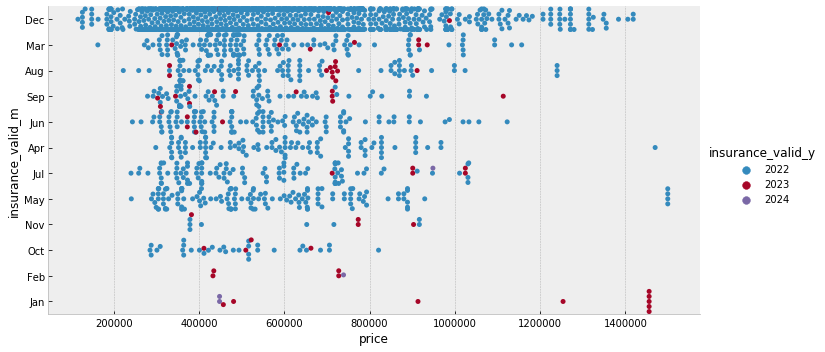

In [143]:
sns.catplot(x="price", y="insurance_valid_m", hue="insurance_valid_y", kind="swarm", data=df, aspect = 2)

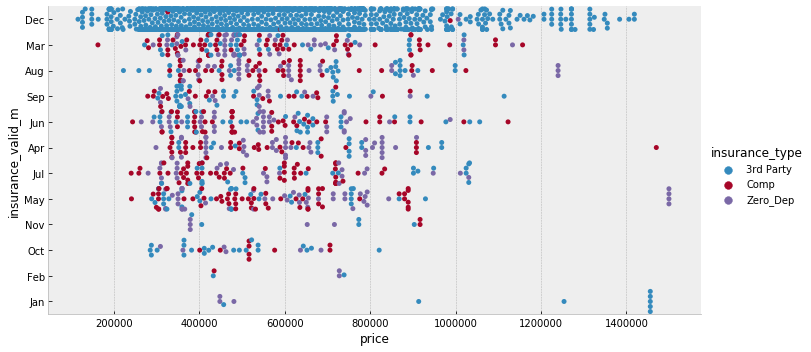

In [144]:
sns.catplot(x="price", y="insurance_valid_m", hue="insurance_type", kind="swarm", data=df, aspect = 2)

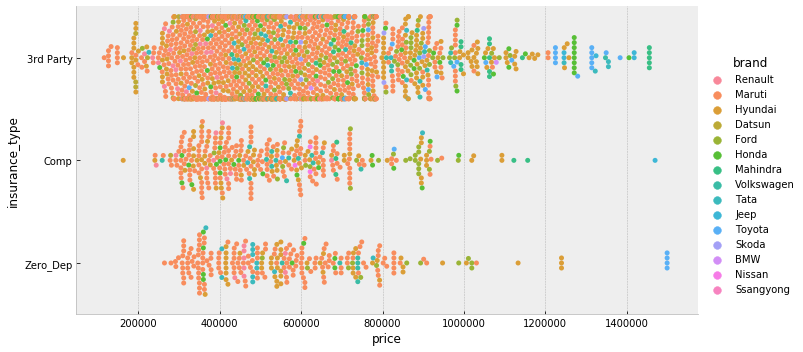

In [145]:
sns.catplot(x="price", y="insurance_type", hue="brand", kind="swarm", data=df, aspect = 2)

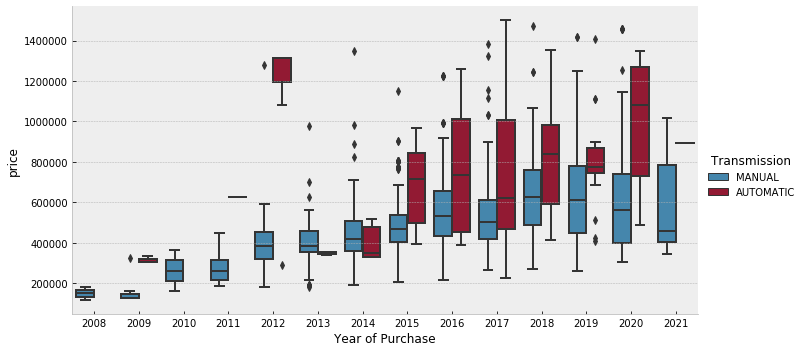

In [146]:
sns.catplot(x="Year of Purchase", y="price", kind="box", hue = "Transmission",data=df, aspect = 2)

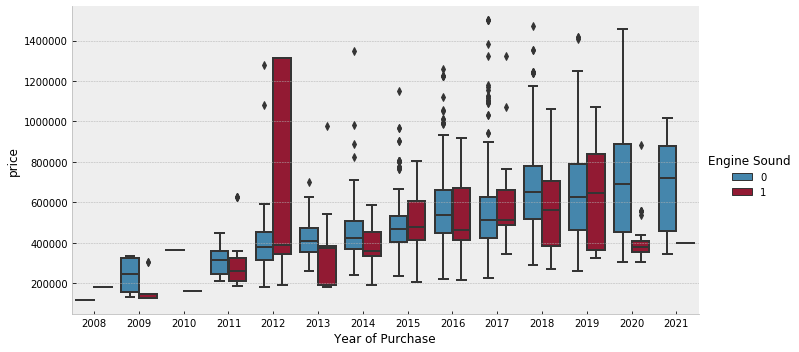

In [147]:
sns.catplot(x="Year of Purchase", y="price", kind="box", hue = "Engine Sound",data=df, aspect = 2)

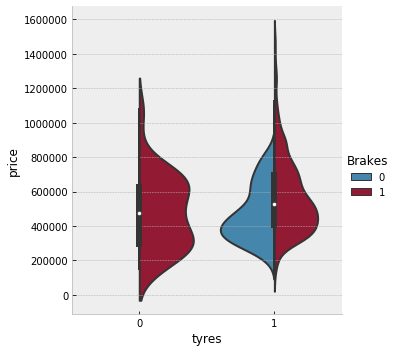

In [148]:
sns.catplot(x="tyres", y="price", kind="violin", split=True, data=df, hue = 'Brakes')

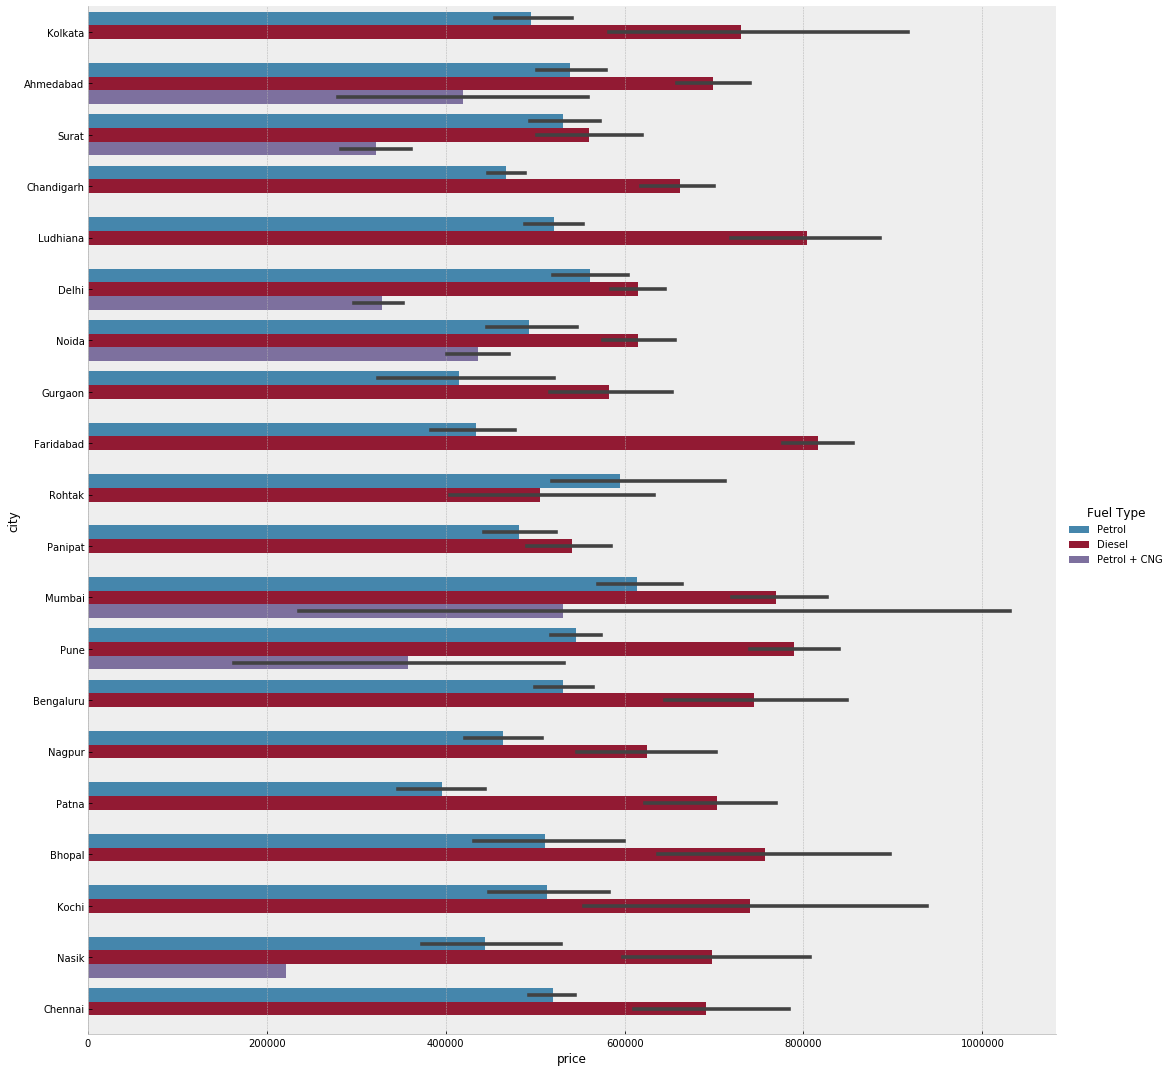

In [149]:
sns.catplot(x="price", y="city", hue="Fuel Type", kind="bar", data=df,height = 15)

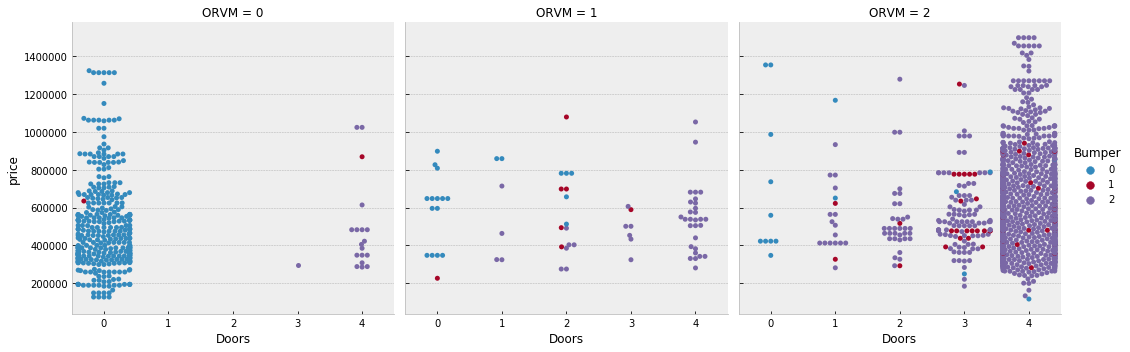

In [150]:
sns.catplot(x="Doors", y="price", hue="Bumper",
            col="ORVM", aspect=1,
            kind="swarm", data=df)

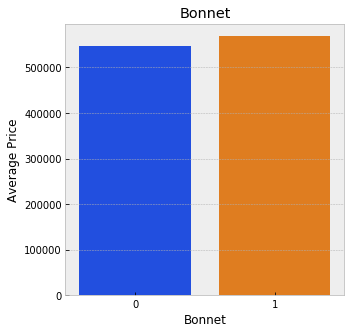

In [151]:
Bonnet_price = df.groupby(['Bonnet']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Bonnet_price.index, Bonnet_price.values, palette='bright')
plt.title('Bonnet')
plt.xlabel('Bonnet')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

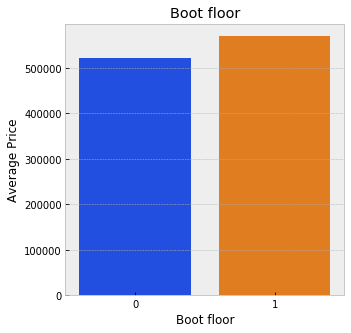

In [152]:
Boot_floor_price = df.groupby(['Boot Floor']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Boot_floor_price.index, Boot_floor_price.values, palette='bright')
plt.title('Boot floor')
plt.xlabel('Boot floor')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

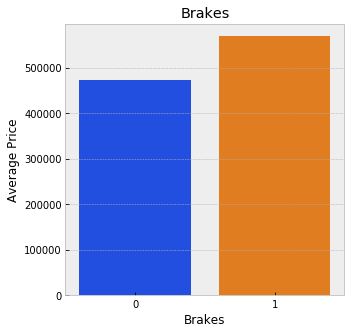

In [153]:
Brakes_price = df.groupby(['Brakes']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Brakes_price.index, Brakes_price.values, palette='bright')
plt.title('Brakes')
plt.xlabel('Brakes')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

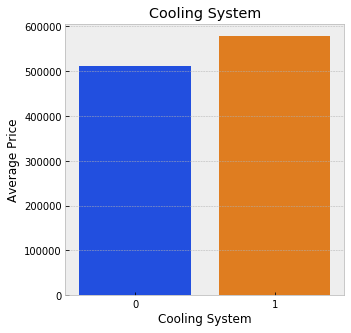

In [154]:
Cooling_price = df.groupby(['Cooling System']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Cooling_price.index, Cooling_price.values, palette='bright')
plt.title('Cooling System')
plt.xlabel('Cooling System')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

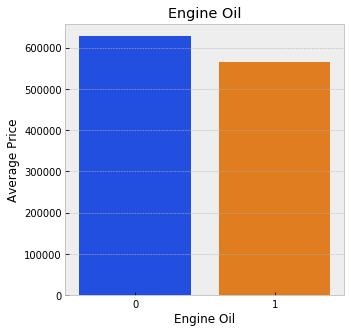

In [155]:
Engine_Oil = df.groupby(['Engine Oil']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Engine_Oil.index, Engine_Oil.values, palette='bright')
plt.title('Engine Oil')
plt.xlabel('Engine Oil')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

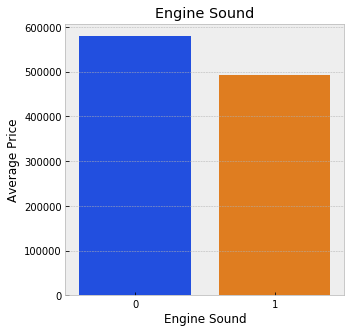

In [156]:
Engine_Sound = df.groupby(['Engine Sound']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Engine_Sound.index, Engine_Sound.values, palette='bright')
plt.title('Engine Sound')
plt.xlabel('Engine Sound')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

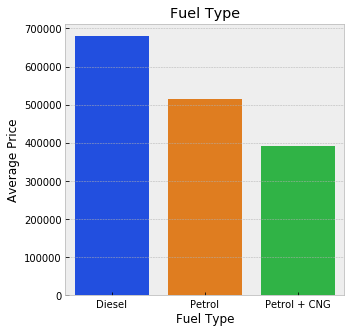

In [157]:
Fuel_Type = df.groupby(['Fuel Type']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Fuel_Type.index, Fuel_Type.values, palette='bright')
plt.title('Fuel Type')
plt.xlabel('Fuel Type')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

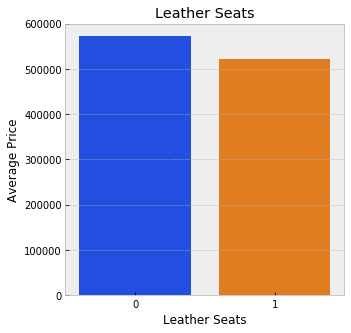

In [158]:
Leather_Seats = df.groupby(['Leather Seats']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Leather_Seats.index, Leather_Seats.values, palette='bright')
plt.title('Leather Seats')
plt.xlabel('Leather Seats')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

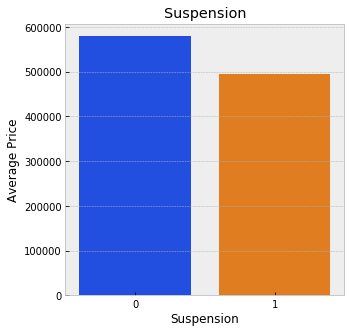

In [159]:
Suspension = df.groupby(['Suspension']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Suspension.index, Suspension.values, palette='bright')
plt.title('Suspension')
plt.xlabel('Suspension')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

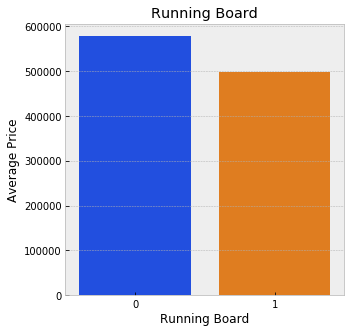

In [160]:
Running_Board = df.groupby(['Running Board']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Running_Board.index, Running_Board.values, palette='bright')
plt.title('Running Board')
plt.xlabel('Running Board')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

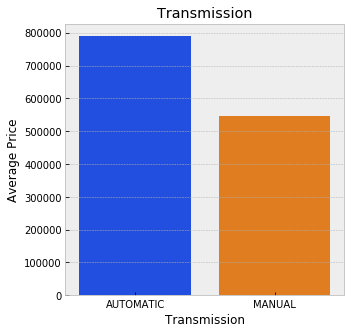

In [161]:
Transmission = df.groupby(['Transmission']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Transmission.index, Transmission.values, palette='bright')
plt.title('Transmission')
plt.xlabel('Transmission')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

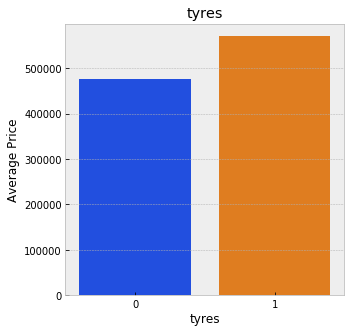

In [162]:
tyres = df.groupby(['tyres']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(tyres.index, tyres.values, palette='bright')
plt.title('tyres')
plt.xlabel('tyres')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

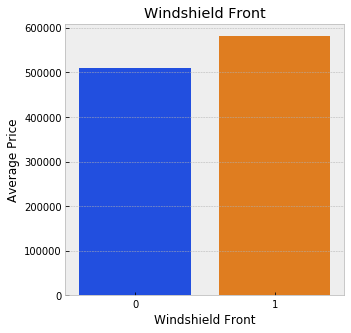

In [163]:
WSF = df.groupby(['Windshield Front']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(WSF.index, WSF.values, palette='bright')
plt.title('Windshield Front')
plt.xlabel('Windshield Front')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

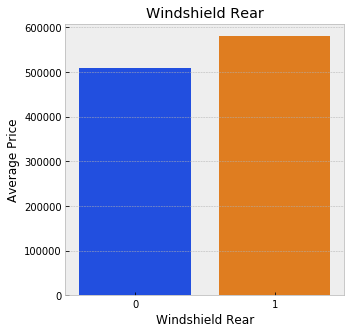

In [164]:
WSR = df.groupby(['Windshield Rear']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(WSR.index, WSR.values, palette='bright')
plt.title('Windshield Rear')
plt.xlabel('Windshield Rear')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

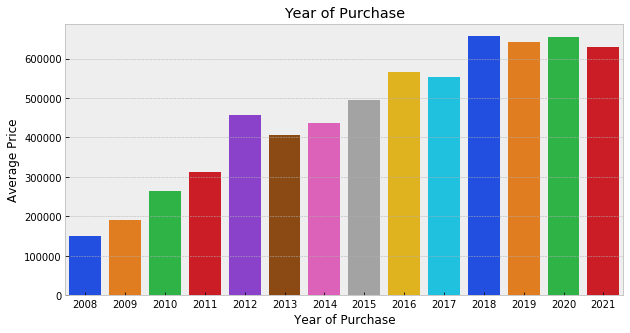

In [165]:
Year = df.groupby(['Year of Purchase']).mean()['price']
plt.figure(figsize=(10, 5))
plt.tick_params(labelsize=10)
sns.barplot(Year.index, Year.values, palette='bright')
plt.title('Year of Purchase')
plt.xlabel('Year of Purchase')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

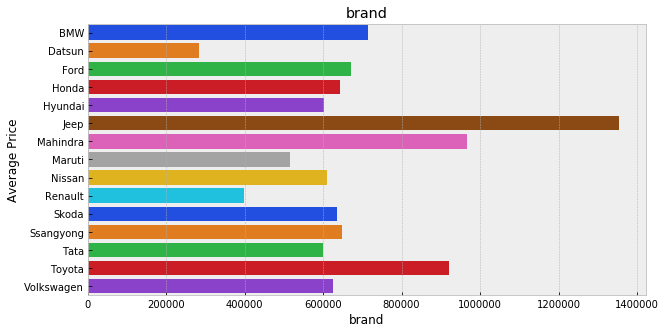

In [166]:
brand = df.groupby(['brand']).mean()['price']
plt.figure(figsize=(10, 5))
plt.tick_params(labelsize=10)
sns.barplot(brand.values, brand.index, palette='bright')
plt.title('brand')
plt.xlabel('brand')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

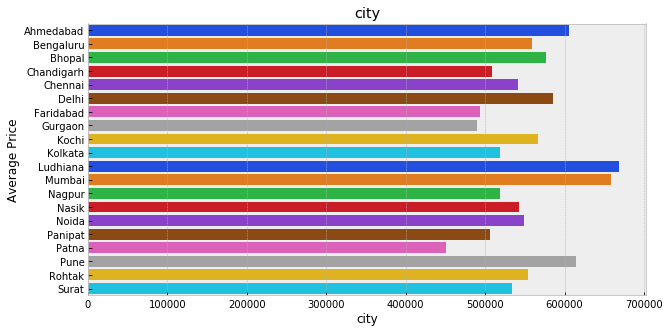

In [167]:
city = df.groupby(['city']).mean()['price']
plt.figure(figsize=(10, 5))
plt.tick_params(labelsize=10)
sns.barplot(city.values, city.index, palette='bright')
plt.title('city')
plt.xlabel('city')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

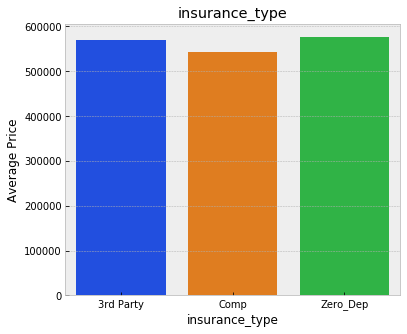

In [168]:
insurance_type = df.groupby(['insurance_type']).mean()['price']
plt.figure(figsize=(6, 5))
plt.tick_params(labelsize=10)
sns.barplot(insurance_type.index, insurance_type.values, palette='bright')
plt.title('insurance_type')
plt.xlabel('insurance_type')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

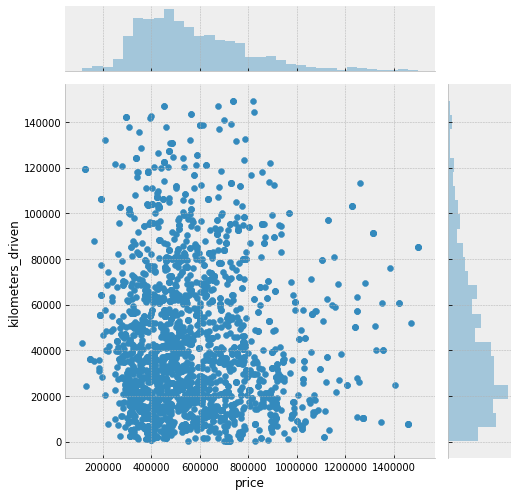

In [187]:
#plt.figure(figsize=(10, 8))
sns.jointplot(df["price"], df["kilometers_driven"], height = 7)

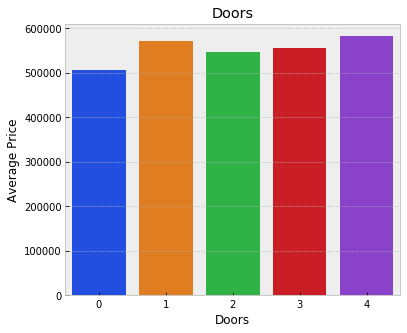

In [170]:
Doors = df.groupby(['Doors']).mean()['price']
plt.figure(figsize=(6, 5))
plt.tick_params(labelsize=10)
sns.barplot(Doors.index, Doors.values, palette='bright')
plt.title('Doors')
plt.xlabel('Doors')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

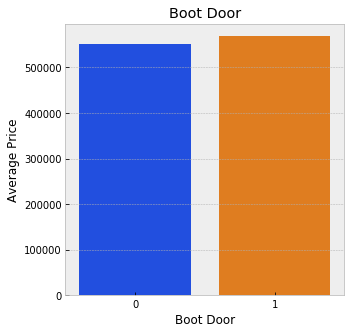

In [171]:
Boot_Door = df.groupby(['Boot Door']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Boot_Door.index, Boot_Door.values, palette='bright')
plt.title('Boot Door')
plt.xlabel('Boot Door')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

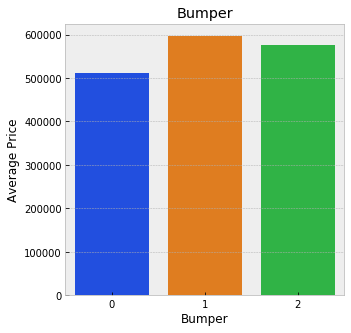

In [172]:
Bumper = df.groupby(['Bumper']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Bumper.index, Bumper.values, palette='bright')
plt.title('Bumper')
plt.xlabel('Bumper')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

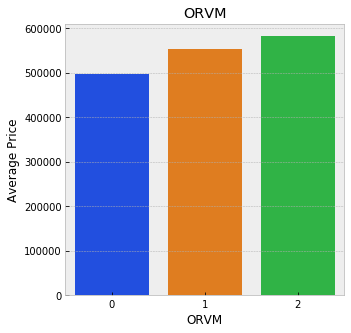

In [173]:
ORVM = df.groupby(['ORVM']).mean()['price']
plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(ORVM.index, ORVM.values, palette='bright')
plt.title('ORVM')
plt.xlabel('ORVM')
plt.style.use('bmh')
plt.ylabel('Average Price')
plt.tick_params(labelsize=10)
plt.show()

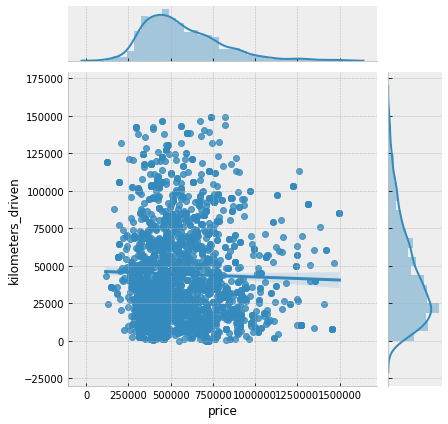

In [174]:
sns.jointplot(df["price"], df["kilometers_driven"], kind = "reg")

In [175]:
df.shape

(2479, 52)

In [178]:
print(imp_feat)

['Audio System', 'Bonnet', 'Boot Floor', 'Brakes', 'Bumper Front', 'Bumper Rear', 'Cooling System', 'Dashboard', 'Boot Door_1', 'Door LHS Rear', 'Door RHS Rear', 'Engine Oil', 'Engine Sound', 'Fuel Type', 'Leather Seats', 'Lights_1', 'ORVM LHS', 'ORVM RHS', 'Running Board', 'Transmission', 'Turbocharger', 'tyres', 'Windshield Front', 'Windshield Rear', 'Year of Purchase', 'brand', 'city', 'insurance_type', 'insurance_valid_m', 'insurance_valid_y', 'kilometers_driven', 'owner']


In [179]:
df=df[['Apron LHS', 'Audio System', 'Bonnet', 'Boot Floor', 'Brakes', 'Bumper', 'Boot Door', 'Doors', 'Engine Mounting', 
       'Engine Oil', 'Engine Sound', 'Fuel Type', 'Leather Seats', 'ORVM', 'Running Board', 'Transmission', 'tyres', 
       'Windshield Front', 'Windshield Rear', 'Year of Purchase', 'brand', 'city', 'insurance_type', 'insurance_valid_m', 
       'insurance_valid_y', 'kilometers_driven', 'owner', 'price']]

Since we have cleaned the data. Now we should save this so that we can load it directly for future use.

In [180]:
df.drop_duplicates()
df.shape

(2479, 28)

In [66]:
df.to_csv("cleaned_df.csv")

### Label encoding

In [191]:
df = pd.read_csv("cleaned_df.csv")
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [192]:
df.dtypes

Apron LHS             int64
Audio System          int64
Bonnet                int64
Boot Floor            int64
Brakes                int64
Bumper                int64
Boot Door             int64
Doors                 int64
Engine Mounting       int64
Engine Oil            int64
Engine Sound          int64
Fuel Type            object
Leather Seats         int64
ORVM                  int64
Running Board         int64
Transmission         object
tyres                 int64
Windshield Front      int64
Windshield Rear       int64
Year of Purchase      int64
brand                object
city                 object
insurance_type       object
insurance_valid_m    object
insurance_valid_y     int64
kilometers_driven     int64
owner                 int64
price                 int64
dtype: object

In [193]:
from sklearn.preprocessing import LabelEncoder

object_col = ['Fuel Type', 'Transmission', 'brand', 'city', 'insurance_type', 'insurance_valid_m', 
              'insurance_valid_y',"Year of Purchase"]
for column in object_col:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

In [194]:
df.head()

,Apron LHS,Audio System,Bonnet,Boot Floor,Brakes,Bumper,Boot Door,Doors,Engine Mounting,Engine Oil,...,Windshield Rear,Year of Purchase,brand,city,insurance_type,insurance_valid_m,insurance_valid_y,kilometers_driven,owner,price
0,1,0,1,1,1,2,1,4,0,1,...,1,9,9,9,0,2,0,27775,1,276199
1,1,0,1,1,1,2,1,4,0,1,...,1,10,7,9,1,7,0,30217,1,559299
2,1,0,1,0,1,2,1,4,0,1,...,1,4,4,9,0,2,0,46591,1,199999
3,1,0,1,1,1,2,1,4,0,1,...,1,1,4,9,1,7,0,35383,1,162599
4,1,0,1,1,1,2,1,4,0,1,...,1,9,4,9,2,7,0,31602,2,505199


## Splitting the data

Since the data was scraped in some order so there is a pre-existence of some order. We need to breake that order by shuffling the data.

In [196]:
from sklearn.utils import shuffle
df = shuffle(df)

# splitting the target and features
X = df.drop('price', axis=1)
y = df['price']

## Scaling the data

Most of the columns in our data are categorical features. Only kilometer driven is numerical feature. It has huge range so we need to scale it before passing the data to the model.

In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X['kilometers_driven'] = scaler.fit_transform(X['kilometers_driven'].values.reshape(-1, 1))

### Splitting the test and training data

In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [205]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
LR.score(X_test, y_test)

0.38710878116040104

In [206]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
score = DT.score(X_test, y_test)
score

0.5897215129895266

In [300]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 70, min_samples_split=3, max_features=15, max_leaf_nodes=800)
RF.fit(X_train, y_train)
accuracy = RF.score(X_test, y_test)
accuracy

0.77828750622543

In [266]:
X.shape

(2479, 27)

In [208]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(n_estimators = 80)
GB.fit(X_train, y_train)
accuracy = GB.score(X_test, y_test)
accuracy

0.6384590708168367

In [310]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(X_train, y_train)
ETR.score(X_test, y_test)

0.7484721308409915

## Fine tuning the best model

Random forest resressor is giving the best results so we can try to optimize if possible.

In [302]:
from sklearn.model_selection import GridSearchCV
param_dict = {
    "n_estimators":range(50, 80, 5),
    "max_features":range(10, 25, 3),
    "min_samples_split":range(2, 5),
    "max_leaf_nodes":range(400, 1000, 30)
}
grid_RF = GridSearchCV(RF,
                      param_grid=param_dict,
                      cv = 5,
                      verbose = 1,
                      n_jobs = -1)
grid_RF.fit(X_train, y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=2000, max_features=15,
                                             max_leaf_nodes=800,
                                             min_samples_split=3,
                                             n_estimators=70),
             n_jobs=-1,
             param_grid={'max_features': range(10, 25, 3),
                         'max_leaf_nodes': range(400, 1000, 30),
                         'min_samples_split': range(2, 5),
                         'n_estimators': range(50, 80, 5)},
             verbose=1)

In [303]:
grid_RF.score(X_test, y_test)

0.7736633184519094

In [305]:
grid_RF.best_params_

{'max_features': 13,
 'max_leaf_nodes': 580,
 'min_samples_split': 2,
 'n_estimators': 55}

There is no significant improvement in the accuracy of the model we can save our model for the future use.